In [1]:
import numpy as np
import matplotlib.pylab as plt
import matplotlib.colors as mcolors
from scipy.optimize import curve_fit

from plotting_helpers import add_gridlines, set_x_ticks, highlight_k_points
from helpers import load_dict

import sys
sys.path.append('..')
from correlations import calculate_structure_factor

In [2]:
plt.rcParams.update({
    "text.usetex": True,
    "font.size": 15,
    "font.family": "Helvetica"
})

column_width = 3.75
square_fig_size=(2*column_width,3/2*column_width)
bigger_font_size=22


# Helper functions

In [3]:
def second_order(x, m1, m2, M_inf_sq):
    return M_inf_sq + m1 * x + m2 * x**2

# Load Data

In [4]:
even = load_dict('./plotting_data/obc_even_data_plotting.pkl')
comm = load_dict('./plotting_data/obc_comm_data_plotting.pkl')
tri = load_dict('./plotting_data/obc_tri_data_plotting.pkl')

Ls_even = np.arange(6,20,2)
Ls_comm = np.arange(6,20,6)


# Plotting Settings

In [5]:
rate_markers={0.158:'*',0.25:'H',0.475:'^'}
rate_lines={0.158:':',0.25:'--',0.475:'-'}
rate_alphas={0.475:0.2,0.25:0.5,0.158:0.9}

colorscale_sq = plt.get_cmap('plasma')
colorscale_tri = plt.get_cmap('viridis')
scales = [1.,2.,4.]
shades = np.linspace(0.,0.9,2*len(scales))[::-2]
colors_sq = colorscale_sq(shades)
colors_tri = colorscale_tri(shades)
scale_shades = {'Square':{1.0:colors_sq[-3],2.0:colors_sq[-2],4.0:colors_sq[-1]},
                'Triangular':{1.0:colors_tri[-3],2.0:colors_tri[-2],4.0:colors_tri[-1]}}

In [6]:
# even
even_marker='s'
even_ms = 7
even_color='grey'
even_linestyle=':'

# comm
comm_marker='s'
comm_ms = 7
comm_color=scale_shades['Square'][2.0]
comm_linestyle=':'

# tri MS
trims_marker='^'
trims_ms = 7
trims_color=scale_shades['Triangular'][2.0]
trims_linestyle='--'


# Energies

/Users/megan/miniconda3/envs/HeisenbergRNN/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/Users/megan/miniconda3/envs/HeisenbergRNN/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


ground-state energy in the TL: -0.5497437847985162


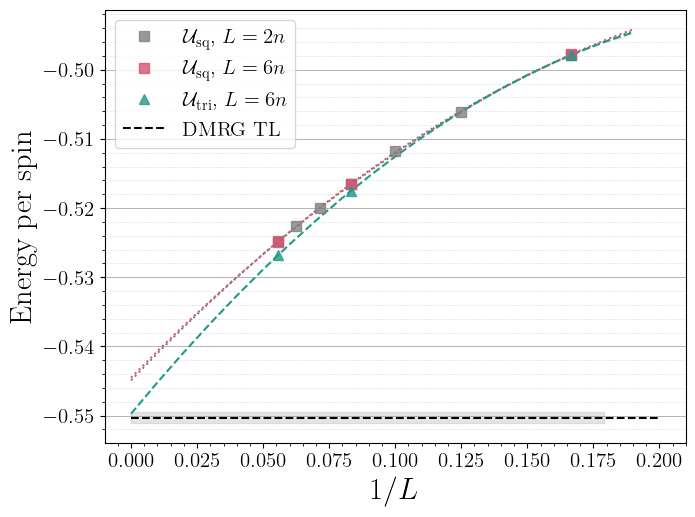

In [7]:
fig, ax = plt.subplots(figsize=square_fig_size)

which_unitary = {
    'Triangular': '$\mathcal{U}_{\mathrm{tri}}$',
    'Square': '$\mathcal{U}_{\mathrm{sq}}$',
}

## open even L run
ax.errorbar(1/Ls_even,even['energies'],fmt='o',
            marker=even_marker,markersize=even_ms,color=even_color,alpha=0.8,label=f'{which_unitary["Square"]}, $L=2n$')  
if len(even['energies'])> 2:
        params, covariance = curve_fit(second_order, 1/Ls_even, even['energies'])
        x_mesh = np.arange(0,0.2,0.01)
        ax.plot(x_mesh,second_order(x_mesh,params[0],params[1],params[2]),
                color=even_color,linestyle=even_linestyle)

## open commensurate L run
ax.errorbar(1/Ls_comm,comm['energies'],fmt='o',
            marker=comm_marker,markersize=comm_ms,color=comm_color,alpha=0.8,label=f'{which_unitary["Square"]}, $L=6n$')  
if len(comm['energies'])> 2:
        params, covariance = curve_fit(second_order, 1/Ls_comm, comm['energies'])
        x_mesh = np.arange(0,0.2,0.01)
        ax.plot(x_mesh,second_order(x_mesh,params[0],params[1],params[2]),
                color=comm_color,linestyle=comm_linestyle)

# Tri MS open commensurate L run
ax.errorbar(1/Ls_comm,tri['energies'],fmt='o',
            marker=trims_marker,markersize=trims_ms,color=trims_color,alpha=0.8,label=f'{which_unitary["Triangular"]}, $L=6n$')  
if len(tri['energies'])> 2:
        params, covariance = curve_fit(second_order, 1/Ls_comm, tri['energies'])
        x_mesh = np.arange(0,0.2,0.01)
        ax.plot(x_mesh,second_order(x_mesh,params[0],params[1],params[2]),
                color=trims_color,linestyle=trims_linestyle)
        print(f"ground-state energy in the TL: {params[-1]}")

## Literature values
# ax.hlines(-0.1819*3,0,max(1/Ls_comm),color='k',alpha=0.4,linestyle='--',label='GFMC')
# ax.hlines(-0.1825*3,0,max(1/Ls_comm),color='k',alpha=0.7,linestyle='--',label='ED')
ax.hlines(-0.55038,0,1.2*max(1/Ls_comm),color='k',alpha=1,linestyle='--',label='DMRG TL')
ax.fill_between(np.arange(0,0.18,0.001),-0.5503-0.0008,-0.5503+0.0008,color='grey',alpha=0.2)

add_gridlines(axes='y')

ax.set_xlabel(r'$1/L$',fontsize=bigger_font_size)
ax.set_ylabel(r'Energy per spin',fontsize=bigger_font_size)

handles, labels = ax.get_legend_handles_labels()
order = np.roll(np.arange(len(handles)),shift=len(handles)-1)
ax.legend([handles[idx] for idx in order], [labels[idx] for idx in order])

filename = 'energies_open'
plt.savefig('./final_figures/'+filename+'.pdf',bbox_inches='tight',pad_inches=0.1)

plt.show()

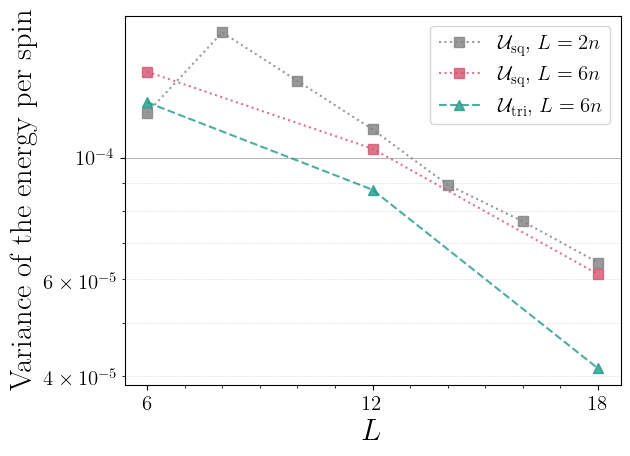

In [8]:
fig, ax = plt.subplots()

## open even L run
ax.errorbar(Ls_even,even['variances'],linestyle=even_linestyle,
            marker=even_marker,markersize=even_ms,color=even_color,alpha=0.8,label=f'{which_unitary["Square"]}, $L=2n$')  

## open commensurate L run
ax.errorbar(Ls_comm,comm['variances'],linestyle=comm_linestyle,
            marker=comm_marker,markersize=comm_ms,color=comm_color,alpha=0.8,label=f'{which_unitary["Square"]}, $L=6n$')  

# Tri MS open commensurate L run
ax.errorbar(Ls_comm,tri['variances'],linestyle=trims_linestyle,
            marker=trims_marker,markersize=trims_ms,color=trims_color,alpha=0.8,label=f'{which_unitary["Triangular"]}, $L=6n$')  

add_gridlines(axes='y')
set_x_ticks(axes=ax,cutoff=-2)
ax.set_yscale('log')
ax.set_xlabel(r'$L$',fontsize=bigger_font_size)
ax.set_ylabel(r'Variance of the energy per spin',fontsize=bigger_font_size)

ax.legend()

filename = 'energy_vars_open'
plt.savefig('./final_figures/'+filename+'.pdf',bbox_inches='tight',pad_inches=0.1)

plt.show()

# Correlations

/Users/megan/miniconda3/envs/HeisenbergRNN/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/Users/megan/miniconda3/envs/HeisenbergRNN/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


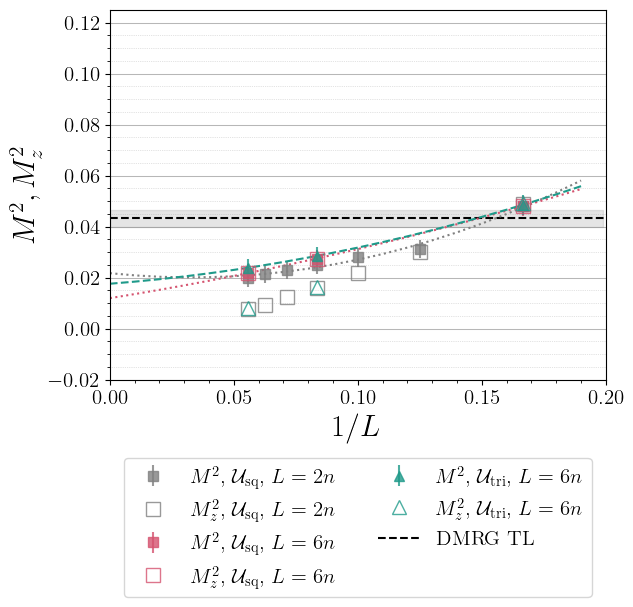

In [9]:
fig, ax = plt.subplots()

## open even L run
plot_x = 1/Ls_even
plot_y = even['M^2']
plot_z = even['Mz^2']
y_err = even['M^2 errors']
z_err = even['Mz^2 errors']
params, covariance = curve_fit(second_order, plot_x, plot_y)

ax.errorbar(plot_x,plot_y,yerr=y_err,
            fmt='o',marker=even_marker,markersize=even_ms,color=even_color,alpha=0.8,
            label=f'$M^2$, {which_unitary["Square"]}, $L=2n$')  
ax.errorbar(plot_x,plot_z,#yerr=z_err,
            fmt='o',marker=even_marker,markersize=even_ms+3,color=even_color,markerfacecolor='None',alpha=0.8,
            label=f'$M_z^2$, {which_unitary["Square"]}, $L=2n$')  

x_mesh = np.arange(0,0.2,0.01)
ax.plot(x_mesh,second_order(x_mesh,params[0],params[1],params[2]),
        color=even_color,linestyle=even_linestyle)

## open commensurate L run
plot_x = 1/Ls_comm
plot_y = comm['M^2']
plot_z = comm['Mz^2']
y_err = comm['M^2 errors']
z_err = comm['Mz^2 errors']
params, covariance = curve_fit(second_order, plot_x, plot_y)

ax.errorbar(plot_x,plot_y,yerr=y_err,
            fmt='o',marker=comm_marker,markersize=comm_ms,color=comm_color,alpha=0.8,
            label=f'$M^2$, {which_unitary["Square"]}, $L=6n$')  
ax.errorbar(plot_x,plot_y,#yerr=z_err,
            fmt='o',marker=comm_marker,markersize=comm_ms+3,color=comm_color,markerfacecolor='None',alpha=0.8,
            label=f'$M^2_z$, {which_unitary["Square"]}, $L=6n$')  

x_mesh = np.arange(0,0.2,0.01)
ax.plot(x_mesh,second_order(x_mesh,params[0],params[1],params[2]),
        color=comm_color,linestyle=comm_linestyle)

# Tri MS open commensurate L run
plot_x = 1/Ls_comm
plot_y = tri['M^2']
plot_z = tri['Mz^2']
y_err = tri['M^2 errors']
z_err = tri['Mz^2 errors']
params, covariance = curve_fit(second_order, plot_x, plot_y)

ax.errorbar(plot_x,plot_y,yerr=y_err,
            fmt='o',marker=trims_marker,markersize=trims_ms,color=trims_color,alpha=0.8,
            label=f'$M^2$, {which_unitary["Triangular"]}, $L=6n$')  
ax.errorbar(plot_x,plot_z,#yerr=z_err,
            fmt='o',marker=trims_marker,markersize=trims_ms+3,color=trims_color,markerfacecolor='None',alpha=0.8,
            label=f'$M^2_z$, {which_unitary["Triangular"]}, $L=6n$')  

x_mesh = np.arange(0,0.2,0.01)
ax.plot(x_mesh,second_order(x_mesh,params[0],params[1],params[2]),
        color=trims_color,linestyle=trims_linestyle)


## Literature values
# ax.hlines(0,0,0.2,color='k',linestyle='-')
# ax.hlines(0.205**2,0,0.2,color='k',alpha=0.4,linestyle='--',label='GFMC')
# ax.hlines(0.25**2,0,0.2,color='k',alpha=0.7,linestyle='--',label='ED')
ax.hlines(0.208**2,0,0.2,color='k',alpha=1,linestyle='--',label='DMRG TL')
ax.fill_between(np.arange(0,0.2,0.001),(0.208-0.008)**2,(0.208+0.008)**2,color='grey',alpha=0.2)

add_gridlines(axes='y')

ax.set_xlabel(r'$1/L$',fontsize=bigger_font_size)
ax.set_ylabel(r'$M^2, M^2_z$',fontsize=bigger_font_size)
ax.set_ylim(-0.02,0.125)
ax.set_xlim(0,.2)

handles, labels = ax.get_legend_handles_labels()
order = np.roll(np.arange(len(handles)),shift=len(handles)-1)
ax.legend([handles[idx] for idx in order], [labels[idx] for idx in order], ncol=2, loc='center',bbox_to_anchor=(0.5,-0.4))

filename = 'M_scaling_open'
plt.savefig('./final_figures/'+filename+'.pdf',bbox_inches='tight',pad_inches=0.1)

plt.show()